<center>
    <img src="https://lh3.googleusercontent.com/proxy/q7ZxMsieilgtYe-hjSpmqNTjMdenU-0NlCYJkwFRhAMIL67NRx9wqRR_xmNIIl7n5DQi5x2gDPpPjtwecFcWw4GPFtZ3e9b5U1i8" width="300" alt="Polynomials"  />
</center>

# Polynomial Regression

The relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial

## Objectives

*   Use scikit-learn to implement Polynomial Regression
*   Create a model, train it, test it and use the model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-01-04 03:52:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.006s  

2022-01-04 03:52:40 (11.5 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#Load all data into a dataframe
df = pd.read_csv("FuelConsumption.csv")

In [4]:
#Create a subset of the dataframe with only columns you are interested in and view first 9 rows of data
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


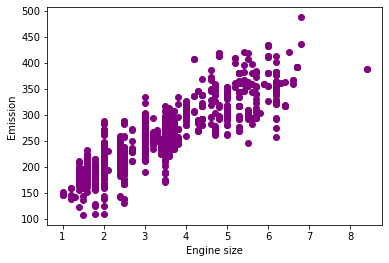

In [6]:
#Create a scatter plot using enginesize as the independent variable and emissions as dependent variable
plt.scatter(new_df.ENGINESIZE, new_df.CO2EMISSIONS,  color='purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
#Train/Test Split the dataset 80%- training the model and 20%- testing the model for out of sample accuracy
msk = np.random.rand(len(df)) < 0.8
train = new_df[msk]
test = new_df[~msk]

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2) #degree of polynial
#fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).
train_x_poly = poly.fit_transform(train_x) #fit the model using training dataset
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [10]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.09789138 -1.37604088]]
Intercept:  [109.68662979]


Text(0, 0.5, 'Emission')

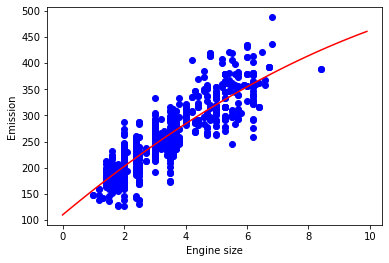

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 23.62
Residual sum of squares (MSE): 957.98
R2-score: 0.77


# Can we improve the accuracy and lessen the error by inceasing the degree of the Polynomial?

Coefficients:  [[ 0.         26.76110579  4.7367607  -0.50346967]]
Intercept:  [133.56886254]
Mean absolute error: 23.57
Residual sum of squares (MSE): 957.56
R2-score: 0.77


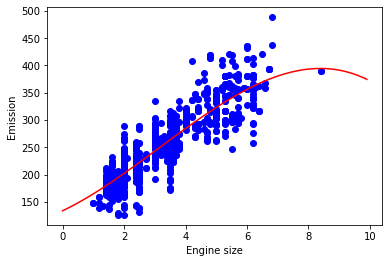

In [13]:
#Plot a 3 degree polynomial by using the training data to fit the model Enginesize vs Emissions
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )